In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics.pairwise import cosine_similarity

### Step 1: Calculate Similarity Matrixes

In [23]:
def get_cosine_similarity_matrix(X, Y):
    """ Cosine Similarity matrix """
    return cosine_similarity(np.column_stack((X, Y)))

def get_euclidean_similarity_matrix(X, Y):
    """ Euclidean Similarity Matrix """
    return 1 / (1 + cdist(np.column_stack((X, Y)), np.column_stack((X, Y)), 'euclidean'))

In [24]:
# Read data
df = pd.read_csv("data.csv")
X = df['x'].values
Y = df['y'].values

# Construct the similarity matrix
cosine_similarity_matrix = get_cosine_similarity_matrix(X, Y)
euclidean_similarity_matrix = get_euclidean_similarity_matrix(X, Y)

print(f"- Cosine Similarity Matrix:\n{cosine_similarity_matrix},\n\n\n- Euclidean Similarity Matrix:\n{euclidean_similarity_matrix}")

- Cosine Similarity Matrix:
[[1.         0.99985238 0.99604997 ... 0.94266984 0.72007789 0.68925746]
 [0.99985238 1.         0.99742859 ... 0.94826473 0.73189397 0.70160425]
 [0.99604997 0.99742859 1.         ... 0.96857935 0.77884743 0.75086792]
 ...
 [0.94266984 0.94826473 0.96857935 ... 1.         0.91036648 0.89153278]
 [0.72007789 0.73189397 0.77884743 ... 0.91036648 1.         0.99905616]
 [0.68925746 0.70160425 0.75086792 ... 0.89153278 0.99905616 1.        ]],


- Euclidean Similarity Matrix:
[[1.         0.30901699 0.01998777 ... 0.03834375 0.02563238 0.02203387]
 [0.30901699 1.         0.02088896 ... 0.04096782 0.02536864 0.02123245]
 [0.01998777 0.02088896 1.         ... 0.02429415 0.01349853 0.01086892]
 ...
 [0.03834375 0.04096782 0.02429415 ... 1.         0.02942488 0.01806962]
 [0.02563238 0.02536864 0.01349853 ... 0.02942488 1.         0.03333333]
 [0.02203387 0.02123245 0.01086892 ... 0.01806962 0.03333333 1.        ]]


### Step 2: Perform K-Means clustering

#### Elbow

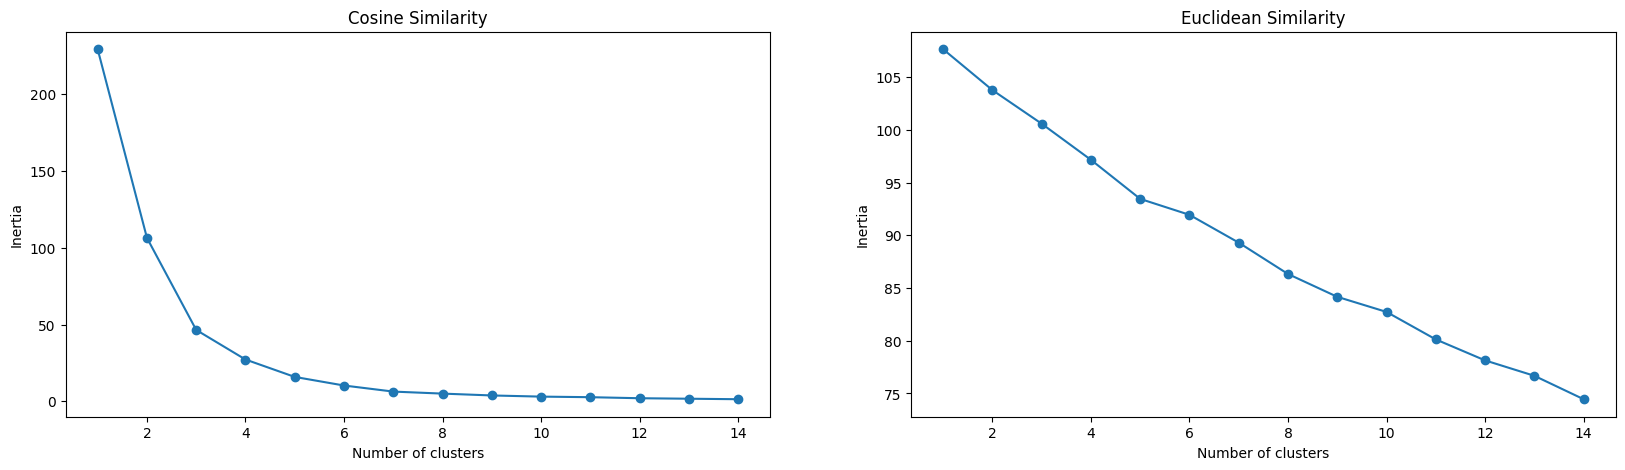

In [25]:
fig, ax =  plt.subplots(1, 2, figsize=(20, 5))

for j, similarity_matrix in enumerate([("Cosine Similarity", cosine_similarity_matrix), ("Euclidean Similarity", euclidean_similarity_matrix)]):
    # Fit
    inertias = []
    for i in range(1, 15):
        kmeans = KMeans(n_clusters=i, n_init=10)
        kmeans.fit(similarity_matrix[1])
        inertias.append(kmeans.inertia_)
    # Plot
    ax[j].plot(range(1, 15), inertias, marker='o')
    ax[j].set_title(similarity_matrix[0])
    ax[j].set_xlabel('Number of clusters')
    ax[j].set_ylabel('Inertia')
plt.show()

#### Cluster

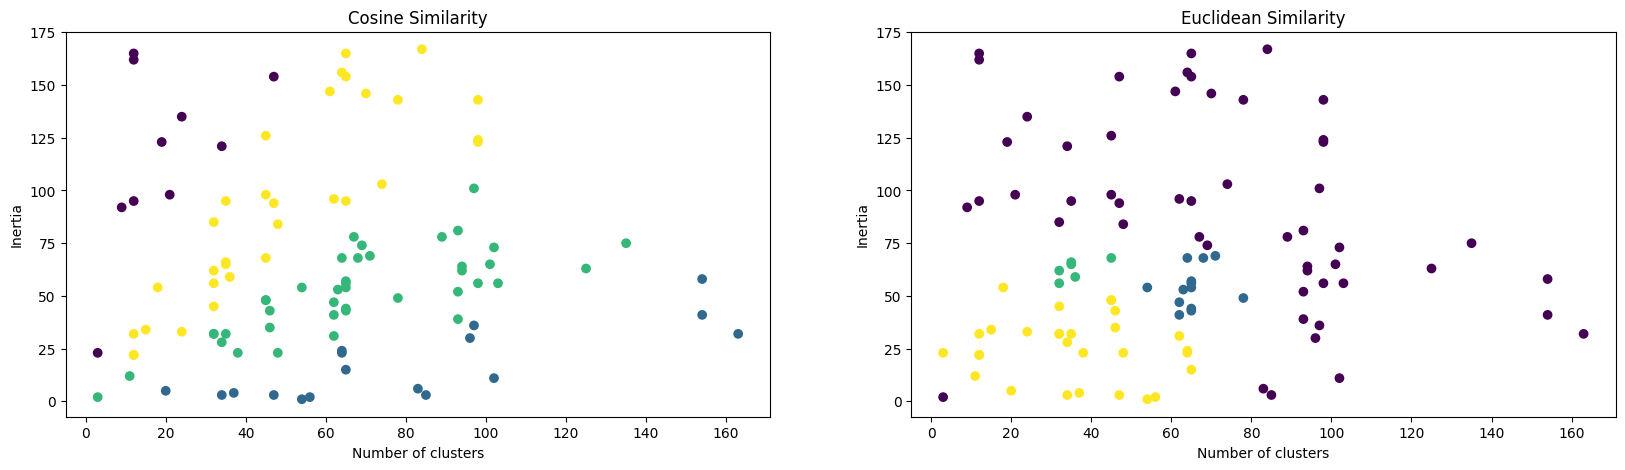

In [26]:
fig, ax =  plt.subplots(1, 2, figsize=(20, 5))

for j, similarity_matrix in enumerate([("Cosine Similarity", cosine_similarity_matrix), ("Euclidean Similarity", euclidean_similarity_matrix)]):
    # Fit
    kmeans = KMeans(n_clusters=4, n_init=10)
    kmeans.fit(similarity_matrix[1])
    # Plot
    ax[j].scatter(X, Y, c=kmeans.labels_)
    ax[j].set_title(similarity_matrix[0])
    ax[j].set_xlabel('Number of clusters')
    ax[j].set_ylabel('Inertia')
plt.show()